In [36]:
import matplotlib.pyplot as plt
import numpy as np

## Esercizio 1, espressioni facciali
Il file `emotions.cv` contiene  9 diverse espressioni facciali. Per ciascun faccia nel file, è presente il tipo di espressione facciale e un'immagine dell'intero viso.
- la colonna *emotions* descrive il tipo di espressione facciale (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral), 
- la colonna *pixels* contiene le immagini, ciascuna di 48x48 pixel dell'espressione facciale. La colonna contiene i 2304 = 48 x 48 valori interi che rappresentano le intensità di grigio dei pixel dell'immagine.

1) Caricate le 9 immagini all'interno di una lista composta da array numpy.

2) Realizzate una sola figura contenente una griglia di 3 x 3 assi sui quali rappresentare le 9 facce. Per ciascuna di esse, indicare la tipologia di espressione facciale nel titolo del grafico relativo. Utilizzare la colormap più idonea.

3) **[FACOLTATIVO DSA]** Ora considerate soltanto la prima immagine del file. Create un istogramma che rappresenti la distribuzione di intensità di grigio dell'immagine.

4) **[FACOLTATIVO DSA]** Considerando soltanto la prima immagine del file, assegnate 0 a tutti i pixel che hanno intensità < 100 e visualizzate l'immagine così trasformata.

In [37]:
file = open("emotion.csv")
righe = file.readlines()
file.close

<function TextIOWrapper.close()>

In [38]:
dati = {"emotion":[], "pixel":[]}

In [39]:
for riga in righe[1:]:
    colonne = riga.split(",")
    dati["emotion"].append(colonne[0])
    stringa_immagine = colonne[1]
    
    lista_immagine = [int(valore) for valore in stringa_immagine[:-1].split(" ")]
    immagine = np.array(lista_immagine).reshape((48,48))
    dati["pixel"].append(immagine)

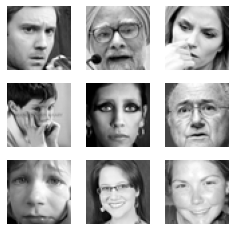

In [51]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (4,4))
counter = 0 
for i in range(0,3):
    for j in range(0,3):
        axs[i,j].imshow(dati["pixel"][counter], cmap = "gray")
        axs[i,j].set_axis_off()
        counter = counter + 1
plt.show()
    

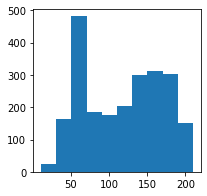

In [59]:
fig, ax = plt.subplots(figsize = (3,3))
ax.hist(dati["pixel"][0].flatten())  #fa tornare la matrice come stringa
plt.show()

In [66]:
prima_immagine = dati["pixel"][0].copy()
prima_immagine[prima_immagine < 100] = 0

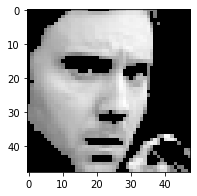

In [67]:
fig, ax = plt.subplots(figsize = (3,3))
ax.imshow(prima_immagine, cmap = "gray")
plt.show()

# ES 2

In [115]:
n_days = 200
np.random.seed(121)
prezzo_giornaliero = 100. + np.cumsum(np.random.normal(0.1, 1.0, n_days))
prezzo_giornaliero

array([ 99.88796683,  99.70303766,  99.22913946,  98.88882929,
        98.65871873,  99.9424133 , 101.65778623, 102.1248487 ,
       102.21072939, 102.94037119, 104.75001192, 103.52302456,
       104.02489768, 103.93347102, 105.43729698, 103.56852843,
       102.87811327, 102.24539167, 102.43313549, 102.03284949,
       102.63696393, 103.34437003, 104.61081962, 105.53524404,
       102.54851944, 103.8128617 , 104.9955133 , 105.5813093 ,
       104.44642502, 102.6875433 , 103.27569958, 103.76159458,
       103.63507309, 103.84274425, 105.66273946, 106.80353327,
       104.45942679, 104.47360972, 103.62536945, 101.24823498,
       102.41111148, 102.73036201, 103.55629787, 103.67570863,
       102.40291902, 102.9998875 , 103.41243052, 103.79890934,
       102.96331862, 102.16058753, 103.12409476, 104.17420355,
       104.98325081, 105.71172403, 105.78584823, 107.28374117,
       108.04459711, 109.23074061, 109.30027182, 108.70930314,
       107.40623075, 106.12272855, 106.94364554, 107.76

In [116]:
mas = np.logical_and(prezzo_giornaliero > np.roll(prezzo_giornaliero,1),
              prezzo_giornaliero > np.roll(prezzo_giornaliero,-1))

In [117]:
prezzo_giornaliero[mas]

array([104.75001192, 104.02489768, 105.43729698, 102.43313549,
       105.53524404, 105.5813093 , 103.76159458, 106.80353327,
       104.47360972, 103.67570863, 103.79890934, 109.30027182,
       107.76095024, 108.15587917, 105.44094125, 105.0580952 ,
       102.98912962, 104.81278529, 106.62047007, 107.26521704,
       111.46737164, 112.62178669, 113.73520037, 113.12464481,
       113.02472917, 113.29256503, 112.26934879, 112.7553739 ,
       113.27211283, 112.85475964, 113.95583421, 115.63582669,
       114.54327183, 117.02383199, 116.00547765, 116.33477617,
       123.71625187, 125.02609578, 127.45429127, 126.75122724,
       127.62894555, 126.64060173, 128.56112348, 126.13883116,
       123.4302339 , 125.05560391, 127.65975231])

In [118]:
min =np.logical_and(prezzo_giornaliero < np.roll(prezzo_giornaliero,1),
              prezzo_giornaliero < np.roll(prezzo_giornaliero,-1))

In [119]:
prezzo_giornaliero[min]

array([ 98.65871873, 103.52302456, 103.93347102, 102.24539167,
       102.03284949, 102.54851944, 102.6875433 , 103.63507309,
       104.45942679, 101.24823498, 102.40291902, 102.16058753,
       106.12272855, 107.20528186, 104.52951183, 104.65072118,
       102.88639147, 102.94651346, 104.14184196, 106.10056237,
       107.23003725, 109.85115214, 111.31043309, 112.70261878,
       111.93398159, 111.67864805, 111.63405726, 111.61653691,
       111.86082103, 111.78761176, 112.76886486, 112.24066882,
       114.18997774, 113.25370627, 115.15291469, 115.29077505,
       115.95804329, 122.60400625, 124.25399182, 126.60484687,
       126.71409272, 125.4448232 , 126.21383726, 125.89525175,
       121.27379582, 123.18260925, 123.63429703])

In [120]:
np.count_nonzero(prezzo_giornaliero > 105)

143

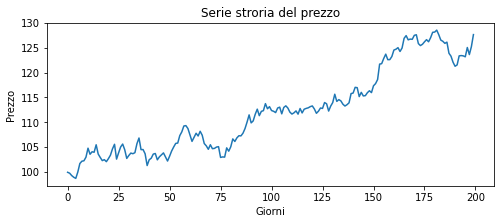

In [121]:
fig, ax = plt.subplots(figsize = (8,3))
ax.plot(prezzo_giornaliero)
ax.set_xlabel("Giorni")
ax.set_ylabel("Prezzo ")
ax.set_title("Serie stroria del prezzo")
plt.show()

In [122]:
prezzo_giornaliero

array([ 99.88796683,  99.70303766,  99.22913946,  98.88882929,
        98.65871873,  99.9424133 , 101.65778623, 102.1248487 ,
       102.21072939, 102.94037119, 104.75001192, 103.52302456,
       104.02489768, 103.93347102, 105.43729698, 103.56852843,
       102.87811327, 102.24539167, 102.43313549, 102.03284949,
       102.63696393, 103.34437003, 104.61081962, 105.53524404,
       102.54851944, 103.8128617 , 104.9955133 , 105.5813093 ,
       104.44642502, 102.6875433 , 103.27569958, 103.76159458,
       103.63507309, 103.84274425, 105.66273946, 106.80353327,
       104.45942679, 104.47360972, 103.62536945, 101.24823498,
       102.41111148, 102.73036201, 103.55629787, 103.67570863,
       102.40291902, 102.9998875 , 103.41243052, 103.79890934,
       102.96331862, 102.16058753, 103.12409476, 104.17420355,
       104.98325081, 105.71172403, 105.78584823, 107.28374117,
       108.04459711, 109.23074061, 109.30027182, 108.70930314,
       107.40623075, 106.12272855, 106.94364554, 107.76

In [128]:
variazione_prezzo = (np.roll(prezzo_giornaliero, -1) - prezzo_giornaliero)[:-1]
variazione_prezzo

array([-0.18492917, -0.47389821, -0.34031017, -0.23011056,  1.28369457,
        1.71537293,  0.46706247,  0.08588069,  0.7296418 ,  1.80964074,
       -1.22698736,  0.50187312, -0.09142667,  1.50382596, -1.86876855,
       -0.69041516, -0.63272161,  0.18774382, -0.400286  ,  0.60411444,
        0.7074061 ,  1.26644959,  0.92442442, -2.9867246 ,  1.26434226,
        1.18265161,  0.58579599, -1.13488428, -1.75888172,  0.58815628,
        0.485895  , -0.12652149,  0.20767116,  1.81999521,  1.14079381,
       -2.34410648,  0.01418293, -0.84824027, -2.37713448,  1.1628765 ,
        0.31925053,  0.82593586,  0.11941076, -1.27278961,  0.59696848,
        0.41254302,  0.38647881, -0.83559072, -0.80273109,  0.96350723,
        1.05010878,  0.80904726,  0.72847323,  0.0741242 ,  1.49789293,
        0.76085595,  1.1861435 ,  0.06953121, -0.59096869, -1.30307239,
       -1.2835022 ,  0.820917  ,  0.81730469, -0.55566838,  0.95059731,
       -0.78831348, -1.67928048, -0.46515717, -0.6936162 ,  0.91

In [129]:
np.max(variazione_prezzo)

3.115557434507835

In [130]:
np.argmax(variazione_prezzo)

152

In [131]:
#modo alternativo

np.arange(0, variazione_prezzo.shape[0])[(variazione_prezzo == np.max(variazione_prezzo))]

array([152])

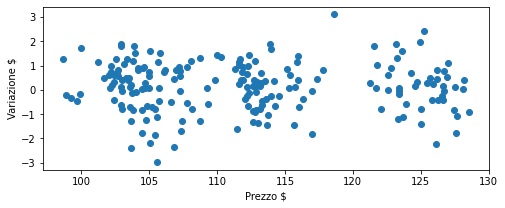

In [132]:
fig, ax = plt.subplots(figsize = (8,3))
ax.scatter(prezzo_giornaliero[:-1], variazione_prezzo)
ax.set_xlabel("Prezzo $")
ax.set_ylabel("Variazione $")
plt.show()

# ES 3

In [101]:
x = np.linspace(-3, 3, 1000)

In [106]:
f1 = np.exp(-x**2)
f2 = np.exp(-x**2) * np.sin(20 * x)
f3 = np.exp(-x**2) * np.cos(20 * x)
f4 = np.sin(20 * x) / 20

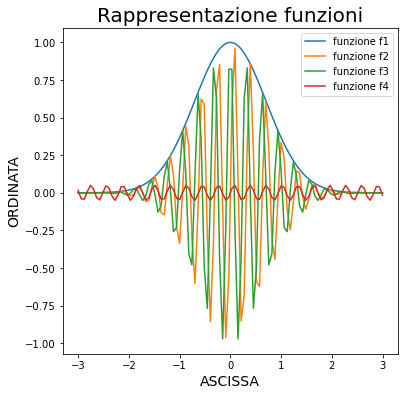

In [109]:
fig, ax = plt.subplots(figsize = (6,6))
ax.set_title("Rappresentazione funzioni", fontsize = 20)
ax.plot(x, f1, label = "funzione f1")
ax.plot(x, f2, label = "funzione f2")
ax.plot(x, f3, label = "funzione f3")
ax.plot(x, f4, label = "funzione f4")
ax.set_xlabel("ASCISSA", fontsize = 14)
ax.set_ylabel("ORDINATA", fontsize = 14)
x = np.linspace(-3, 3, 100)
ax.legend()
plt.show()